![title](https://image.ibb.co/erDntK/logo2018.png)

---

<table  class="tfo-notebook-buttons" align="left"><tr><td>
    
<a href="https://colab.research.google.com/github/CNN-ADF/Task2020/blob/master/notebooks/CNN2020 - 00 - Nearest Neighbor.ipynb" source="blank" ><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>
</td><td>
<a href="https://github.com/CNN-ADF/Task2020/blob/master/notebooks/CNN2020 - 00 - Nearest Neighbor.ipynb" source="blank" ><img src="https://i.ibb.co/6NxqGSF/pinpng-com-github-logo-png-small.png"></a>
    
</td></tr></table>

# Exercise 0 - K-Nearest Neighbor


In this exercise you will investigate and grasp the basic understanding of a simple classification and hyperparameter tuning using basic k-Nearest Neighbor classifier. The aim is to understand how to split the train / val / test set and the use of validation data for hyperparameter tuning.

---
## 0 - Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time 
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(3)

from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import cdist

---
## 1 - Generate Data

* generate `6000` data of `4 classes`
* get `90%` of it as training set and the rest as test set

In [2]:
n_data = 6000
n_test = int(n_data*.9)//2

X1, y1 = make_classification(n_samples=n_data//2, n_features=2, n_redundant=0, n_informative=2,  shift=0.2, flip_y=0.09,
                             n_clusters_per_class=2, n_classes=2, class_sep=1.5, random_state=27)


X2, y2 = make_classification(n_samples=n_data//2, n_features=2, n_redundant=0, n_informative=2, shift=0.5, flip_y=0.09,
                             n_clusters_per_class=2, n_classes=2, class_sep=2, random_state=13)

y2+=2
X2+=1.5

X_train = np.vstack((X1[:n_test,:],X2[:n_test,:]))
y_train = np.hstack((y1[:n_test],y2[:n_test]))
X_test = np.vstack((X1[n_test:,:],X2[n_test:,:]))
y_test = np.hstack((y1[n_test:,],y2[n_test:]))

In [3]:
idx = np.arange(X_train.shape[0])
np.random.shuffle(idx)
X_train = X_train[idx,:]
y_train = y_train[idx]

In [4]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (5400, 2)
y_train.shape = (5400,)
X_test.shape  = (600, 2)
y_test.shape  = (600,)


**Expected Output**: 
<pre>
X_train.shape = (5400, 2)
y_train.shape = (5400,)
X_test.shape  = (600, 2)
y_test.shape  = (600,)


---
## 2 - Scatter Plot Data
* function to show scatter plot of data

In [5]:
COLORS=['red','green','blue','black']

def scatter_plot(ax, x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_s = x[y==unique[li]]
        ax.scatter(x_s[:,0],x_s[:,1],c=COLORS[li])
        ax.grid(b=True, which='both', color='k', linestyle='-',linewidth=.1)


trainset


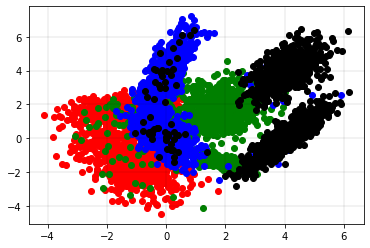

testset


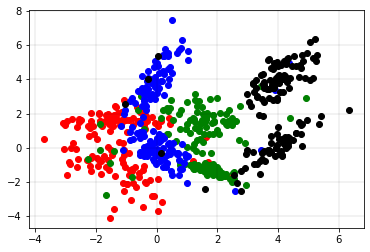

In [6]:
print('trainset')
fig, ax = plt.subplots()
scatter_plot(ax, X_train, y_train)
plt.show()

print('testset')
fig, ax = plt.subplots()
scatter_plot(ax, X_test, y_test)
plt.show()

---
## 3 -  K Nearest Neighbor from scratch
* K Nearest Neighbor class

In [7]:
class KNearestNeighbor(object):

    def __init__(self, x, y):
        self.x_train = x
        self.y_train = y


    def predict(self, x, k, distance='euclidean'):
        num_test = x.shape[0]
        num_train = self.x_train.shape[0]
        dists = np.zeros((num_test, num_train))
        if distance == 'euclidean':
            dists = cdist(x, self.x_train)
        elif distance == 'manhattan':
            dists = cdist(x, self.x_train, metric='cityblock')
        else:
            pass
        
        return self.__predict_labels(dists, k=k)

    def __predict_labels(self, dists, k):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []      # list dengan lebar k berisi label dari
                                # sebanyak k-tetangga terdekat terhadap data uji ke-i
            closest_y = [self.y_train[idx] for idx in np.argsort(dists[i])[:k]]

            labels = []
            count = []
            count_index = -1
            prev = -1
            for j in np.sort(closest_y):
                if j != prev:
                    count.append(1)
                    count_index += 1
                    prev = j
                    labels.append(j)
                else:
                    count[count_index] += 1
            y_pred[i] = labels[np.argmax(count)]

        return y_pred


---
# Questions
* **Question 1:** what is the training time of KNN Classifier?


* **Question 2:** how is the training time of KNN Classifier as the training set and/or testing set grow larger?


* **Question 3:** how is the testing time of KNN Classifier compared to the training time? is it faster or slower?


* **Question 4:** how is the testing time of KNN Classifier as the training set and/or testing set grow larger?

In [ ]:
pause, read the questions first, then continue 
# delete or comment this cell

---
## 4 - Train KNN Classifier


In [8]:
tic = time.time()
knn = KNearestNeighbor(X_train, y_train)
toc = time.time()

print('training speed =', toc-tic,'seconds')

training speed = 8.988380432128906e-05 seconds


---
## 5 - Testing KNN Classifier

In [9]:
tic = time.time()
knn.predict(X_test, k=3)
toc = time.time()

print('testing speed = {0:.3f} seconds'.format(toc-tic))

testing speed = 0.319 seconds


---
## 6 - Testing KNN Classifier as the Training set grow larger
* test KNN classifier using trainset form 1000 to 6000 in 1000 data increment

In [10]:
times = []

n_data = np.arange(1000,X_train.shape[0]+1,1000)

for n in n_data:    
    tic = time.time()
    knn_small = KNearestNeighbor(X_train[:n], y_train[:n])
    knn_small.predict(X_test, k=1)    
    toc = time.time()
    
    times.append(toc-tic)

testing speed


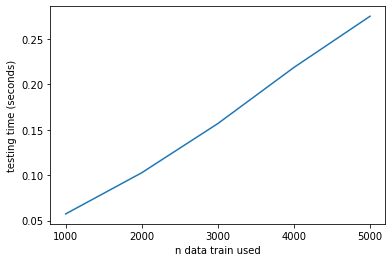

In [11]:
print('testing speed')
plt.plot(times)
plt.ylabel('testing time (seconds)')
plt.xlabel('n data train used')
plt.xticks(np.arange(len(n_data)), n_data)
plt.show()

---
# Questions
* **Question 5:** what is the accuracy of Nearest Neighbor `(k=1)` on Training set? <br>Why is that?


* **Question 6:** is the accuracy of k-Nearest Neighbor `(k>1)` on Training set will be equivalent to using Nearest Neighbor `(k=1)`?<br>is it higher or lower? Why is that?


In [ ]:
pause, read the questions first, then continue 
# delete or comment this cell

---
## 7 - Nearest Neighbor Accuracy

---
### a. Nearest Neightbor (k=1)

In [12]:
accuracy = accuracy_score(y_train, knn.predict(X_train, k=1))

print('Nearest Neighbor Accuracy = {0:.2f}%'.format(accuracy*100))

Nearest Neighbor Accuracy = 100.00%


---
### b. 3-Nearest Neightbor (k=3)

In [13]:
accuracy = accuracy_score(y_train, knn.predict(X_train, k=3))

print('3-Nearest Neighbor Accuracy = {0:.2f}%'.format(accuracy*100))

3-Nearest Neighbor Accuracy = 91.20%


---
### c. 9-Nearest Neightbor (k=9)

In [14]:
accuracy = accuracy_score(y_train, knn.predict(X_train, k=9))

print('9-Nearest Neighbor Accuracy = {0:.2f}%'.format(accuracy*100))

9-Nearest Neighbor Accuracy = 90.20%


---
# Questions
* **Question 7:** what is the difference when using the Euclidean distance and using Manhattan distance?


In [ ]:
pause, read the questions first, then continue 
# delete or comment this cell

---
## 8 - Classifier Area Plot
* function to show the classification area

In [15]:
from matplotlib.colors import ListedColormap

def plot_model(classifier, X, y, k, distance):
    h = .2
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAAAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#111111'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()], k=k, distance=distance)

    Z = Z.reshape(xx.shape)
    
    print('plotting distance', distance)
    
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
              edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    
  

---
## 9 - K-Nearest Neighbor area
* plot the classification area of KNN Classifier to show the difference between using Euclidean distance and Manhattan distance
* here we use only 200 data training to clearly show the plot

### a. Create mini trainset

In [16]:
n_small = 200
X_tr_small = X_train[:n_small,:]
y_tr_small = y_train[:n_small]

knn_small = KNearestNeighbor(X_tr_small,y_tr_small)

### b. Euclidean Nearest Neighbor 

plotting distance euclidean


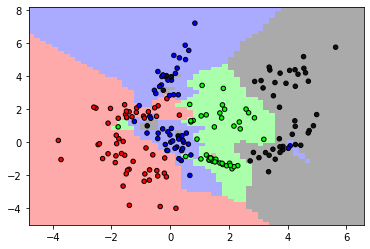

In [17]:
plot_model(knn_small, X_tr_small, y_tr_small, k=1, distance='euclidean')

### c. Manhattan Nearest Neighbor

plotting distance manhattan


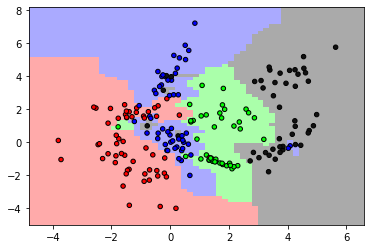

In [18]:
plot_model(knn_small, X_tr_small, y_tr_small, k=1, distance='manhattan')

### d. 3-Nearest Neighbor area

plotting distance euclidean


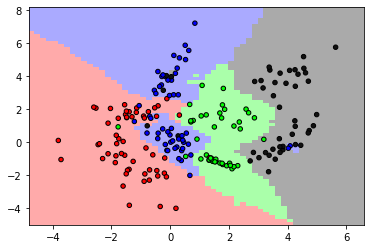

plotting distance manhattan


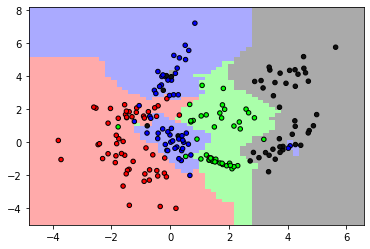

In [19]:
plot_model(knn_small, X_tr_small, y_tr_small, k=3, distance='euclidean')

plot_model(knn_small, X_tr_small, y_tr_small, k=3, distance='manhattan')

### e. 10-Nearest Neighbor area

plotting distance euclidean


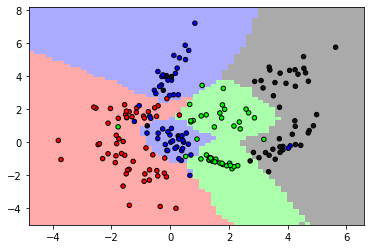

plotting distance manhattan


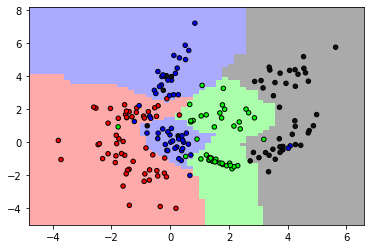

In [20]:
plot_model(knn_small, X_tr_small, y_tr_small, k=10, distance='euclidean')

plot_model(knn_small, X_tr_small, y_tr_small, k=10, distance='manhattan')

---
# Questions
* **Question 8:** Which one of these following options is the best way to determine the hyperparameter?
    * explain in detail why each choice is good or bad


In [ ]:
pause, read the questions first, then continue 
# delete or comment this cell

---
## 10 - KNN Hyperparameters 1

* how to determine which is the best k to use

### Option 1

In [21]:
k_tries = [1, 3, 5, 7, 9, 11, 13]
acc_list = []
for k in k_tries:
    acc = accuracy_score(y_train, knn.predict(X_train, k=k))
    acc_list.append(acc)
    
id_k = np.argmax(acc_list)
print('the best k is ',k_tries[id_k], ', with accuracy = {0:.2f}%'.format(acc_list[id_k]*100))

the best k is  1 , with accuracy = 100.00%


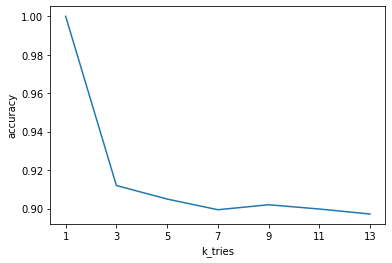

In [22]:
plt.plot(acc_list)
plt.ylabel('accuracy')
plt.xlabel('k_tries')
plt.xticks(np.arange(len(k_tries)), k_tries)
plt.show()

### Option 2

In [23]:
k_tries = [3, 5, 7, 9, 11, 13]
acc_list = []
for k in k_tries:
    acc = accuracy_score(y_train, knn.predict(X_train, k=k))
    acc_list.append(acc)
    
    
id_k = np.argmax(acc_list)
print('the best k is ',k_tries[id_k], ', with accuracy = {0:.2f}%'.format(acc_list[id_k]*100))

the best k is  3 , with accuracy = 91.20%


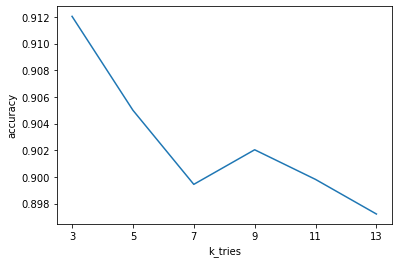

In [24]:
plt.plot(acc_list)
plt.ylabel('accuracy')
plt.xlabel('k_tries')
plt.xticks(np.arange(len(k_tries)), k_tries)
plt.show()

### Option 3

In [25]:
k_tries = [3, 5, 7, 9, 11, 13]
acc_list = []
for k in k_tries:
    acc = accuracy_score(y_test, knn.predict(X_test, k=k))
    acc_list.append(acc)
    
    
id_k = np.argmax(acc_list)
print('the best k is ',k_tries[id_k], ', with accuracy = {0:.2f}%'.format(acc_list[id_k]*100))

the best k is  7 , with accuracy = 90.50%


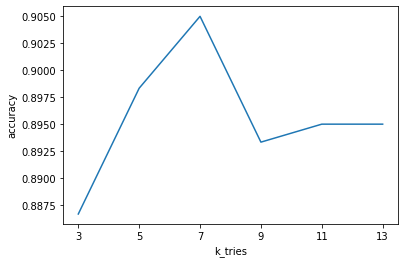

In [26]:
plt.plot(acc_list)
plt.ylabel('accuracy')
plt.xlabel('k_tries')
plt.xticks(np.arange(len(k_tries)), k_tries)
plt.show()

### Option 4

In [27]:
k_tries = [3, 5, 7, 9, 11, 13]

val_slice = int(X_train.shape[0]*.9)
X_tr = X_train[:val_slice,:]
y_tr = y_train[:val_slice]
X_val = X_train[val_slice:,:]
y_val = y_train[val_slice:]

knn_val = KNearestNeighbor(X_tr, y_tr)

acc_list = []
for k in k_tries:
    acc = accuracy_score(y_val, knn_val.predict(X_val, k=k))
    acc_list.append(acc)
    
    
id_k = np.argmax(acc_list)
print('the best k is ',k_tries[id_k], ', with accuracy = {0:.2f}%'.format(acc_list[id_k]*100))

the best k is  11 , with accuracy = 89.63%


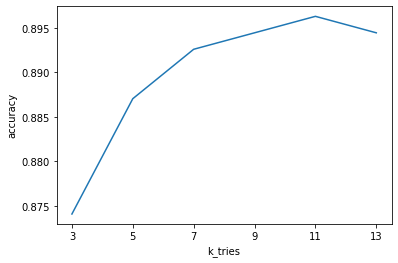

In [28]:
plt.plot(acc_list)
plt.ylabel('accuracy')
plt.xlabel('k_tries')
plt.xticks(np.arange(len(k_tries)), k_tries)
plt.show()

---
# Questions
* **Question 9:** Which one of these following options is the best way to determine the hyperparameter?
    * explain in detail why each choice is good or bad
    

In [ ]:
pause, read the questions first, then continue 
# delete or comment this cell

---
## 11 - KNN Hyperparameters 2
* how to determine which is the best k to use

### Option 5

In [29]:
k_tries = [3, 5, 7, 9, 11, 13]

val_slice = int(X_train.shape[0]*.9)
mask = np.arange(X_train.shape[0])
np.random.shuffle(mask)

X_tr = X_train[mask[:val_slice],:]
y_tr = y_train[mask[:val_slice]]
X_val = X_train[mask[val_slice:],:]
y_val = y_train[mask[val_slice:]]

knn_val = KNearestNeighbor(X_tr, y_tr)

acc_list = []
for k in k_tries:
    acc = accuracy_score(y_val, knn_val.predict(X_val, k=k))
    acc_list.append(acc)
    
    
id_k = np.argmax(acc_list)
print('the best k is ',k_tries[id_k], ', with accuracy = {0:.2f}%'.format(acc_list[id_k]*100))

the best k is  7 , with accuracy = 91.11%


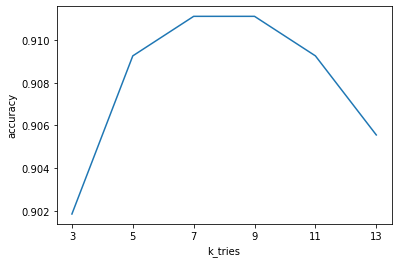

In [30]:
plt.plot(acc_list)
plt.ylabel('accuracy')
plt.xlabel('k_tries')
plt.xticks(np.arange(len(k_tries)), k_tries)
plt.show()

### Option 6

In [31]:
k_tries = [3, 5, 7, 9, 11, 13]

val_slice = int(X_train.shape[0]*.9)
mask = np.arange(X_train.shape[0])

acc_list = []
for k in k_tries:  
    
    np.random.shuffle(mask)
    X_tr = X_train[mask[:val_slice],:]
    y_tr = y_train[mask[:val_slice]]
    X_val = X_train[mask[val_slice:],:]
    y_val = y_train[mask[val_slice:]]
    
    knn_val = KNearestNeighbor(X_tr, y_tr)
    
    acc = accuracy_score(y_val, knn_val.predict(X_val, k=k))
    acc_list.append(acc)
    
id_k = np.argmax(acc_list)
print('the best k is ',k_tries[id_k], ', with accuracy = {0:.2f}%'.format(acc_list[id_k]*100))

the best k is  7 , with accuracy = 90.74%


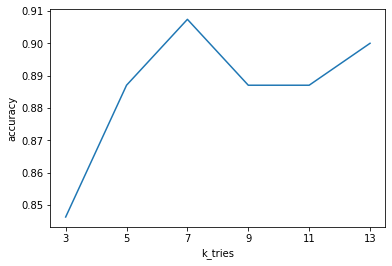

In [32]:
plt.plot(acc_list)
plt.ylabel('accuracy')
plt.xlabel('k_tries')
plt.xticks(np.arange(len(k_tries)), k_tries)
plt.show()

---

# Congratulation, You've Completed Exercise 0

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2020 - ADF</a> </p>

![footer](https://image.ibb.co/hAHDYK/footer2018.png)